<a href="https://colab.research.google.com/github/sdlm/pytorch_mnist/blob/master/keras_circles_experiment_01v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from PIL import Image, ImageDraw

In [0]:
DIAMETER = 20
IMG_SIZE = 200
MARGIN = 50
TRAIN_COUNT = 10
TEST_COUNT = 10
EPOCHS_COUNT = 2

In [0]:
def generate_image(is_not_empty: int, x: int, y: int) -> Image:
    image = Image.new('L', (IMG_SIZE, IMG_SIZE))
    draw = ImageDraw.Draw(image)
    draw.rectangle([(0, 0), image.size], fill='black')
    if is_not_empty:
        coords = (x, y, x + DIAMETER, y + DIAMETER)
        draw.ellipse(coords, fill='white')
    return image


def generate_dataset(count: int):
    max_coord = IMG_SIZE - 2 * MARGIN
    x_arr = MARGIN + np.random.randint(max_coord, size=count)
    y_arr = MARGIN + np.random.randint(max_coord, size=count)
    is_not_empty_arr = np.random.randint(2, size=count)
    images = [
        generate_image(is_not_empty_arr[i], x_arr[i], y_arr[i])
        for i in range(count)
    ]
    arr = np.array([
        np.array(im)
        for im in images
    ])
    return arr, is_not_empty_arr

In [0]:
train_images, train_labels = generate_dataset(1000)
test_images, test_labels = generate_dataset(100)
validation_images, validation_labels = generate_dataset(100)

In [0]:
shape = train_images.shape
train_images = train_images.reshape(shape[0], shape[1] * shape[2])
train_images = train_images.astype('float32') / 255

shape = test_images.shape
test_images = test_images.reshape(shape[0], shape[1] * shape[2])
test_images = test_images.astype('float32') / 255

shape = validation_images.shape
validation_images = validation_images.reshape(shape[0], shape[1] * shape[2])
validation_images = validation_images.astype('float32') / 255

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(train_images.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [78]:
history = model.fit(train_images, train_labels, epochs=EPOCHS_COUNT, batch_size=64, validation_data=(validation_images, validation_labels))
results = model.evaluate(test_images, test_labels)

Train on 1000 samples, validate on 100 samples
Epoch 1/2
1000/1000 [==============================] - 1s 835us/step - loss: 0.5594 - acc: 0.7300 - val_loss: 0.3465 - val_acc: 1.0000
Epoch 2/2
100/100 [==============================] - 0s 232us/step


In [79]:
results

[0.2774134290218353, 1.0]

In [86]:
model.predict(test_images)[:10]

array([[0.97545445],
       [0.96692455],
       [0.9765236 ],
       [0.9714533 ],
       [0.9854248 ],
       [0.9809352 ],
       [0.49137312],
       [0.49137312],
       [0.49137312],
       [0.9510456 ]], dtype=float32)

In [85]:
test_labels[:10]

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [82]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

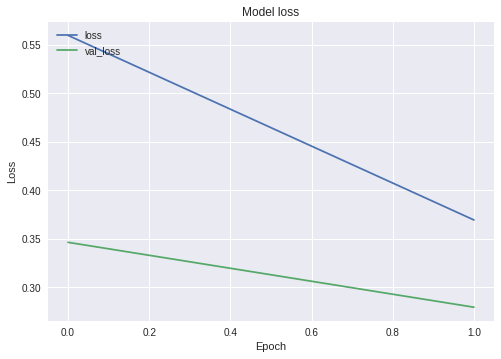

In [83]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

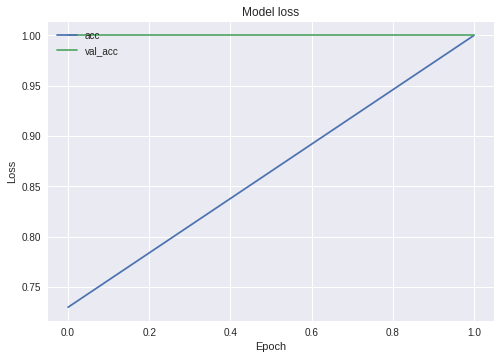

In [84]:

# Plot training & validation loss values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()